In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [36]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot']

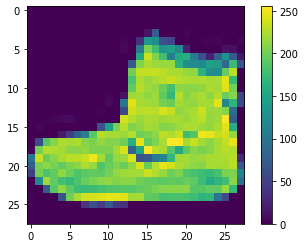

In [37]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [38]:
#11111111(2) = 255(10)
x_train = x_train / 255.0
x_test = x_test / 255.0

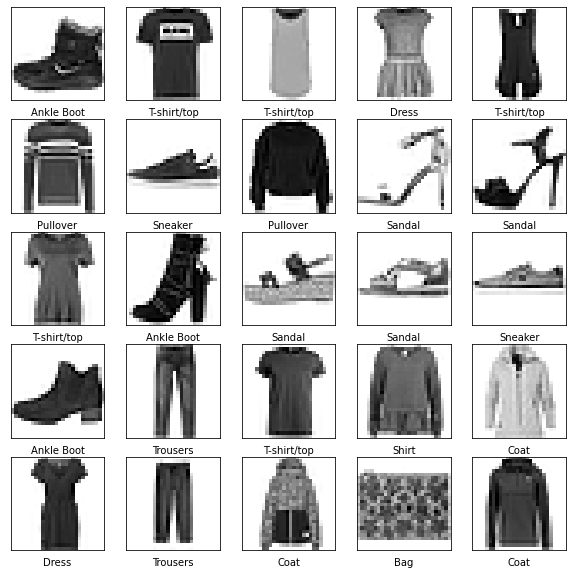

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5)
test_loss, test_accu = model.evaluate(x_test, y_test)
print("Dokładność uczenia: {0}", test_accu)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4997 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3757 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3396 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.3177 - accuracy: 0.8834
Epoch 5/5
313/313 [==============================] - 0s 782us/step - loss: 0.3897 - accuracy: 0.8585
Dokładność uczenia: {0} 0.8585000038146973


In [41]:
#11111111(2) = 255(10)
x_train = x_train / 255.0
x_test = x_test / 255.0

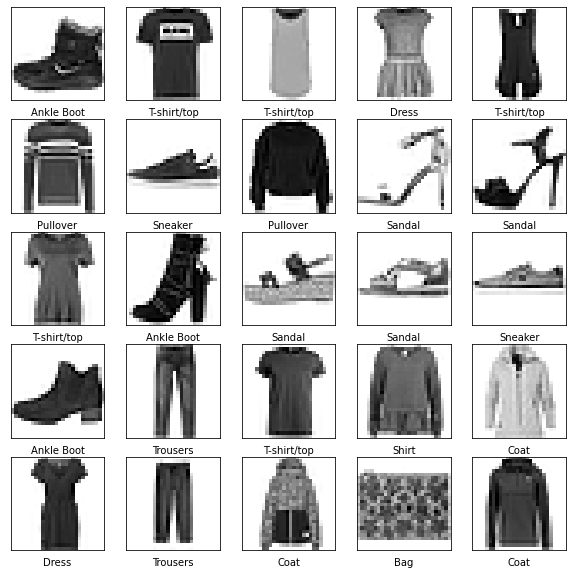

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 40)
test_loss, test_accu = model.evaluate(x_test, y_test)
print("Dokładność uczenia:", test_accu)

Epoch 1/40
1875/1875 [==============================] - 2s 908us/step - loss: 1.0801 - accuracy: 0.6651
Epoch 2/40
1875/1875 [==============================] - 2s 878us/step - loss: 0.6391 - accuracy: 0.7702
Epoch 3/40
1875/1875 [==============================] - 2s 873us/step - loss: 0.5653 - accuracy: 0.7971
Epoch 4/40
1875/1875 [==============================] - 2s 889us/step - loss: 0.5234 - accuracy: 0.8145
Epoch 5/40
1875/1875 [==============================] - 2s 883us/step - loss: 0.4943 - accuracy: 0.8247
Epoch 6/40
1875/1875 [==============================] - 2s 889us/step - loss: 0.4737 - accuracy: 0.8332
Epoch 7/40
1875/1875 [==============================] - 2s 889us/step - loss: 0.4583 - accuracy: 0.8389
Epoch 8/40
1875/1875 [==============================] - 2s 875us/step - loss: 0.4453 - accuracy: 0.8434
Epoch 9/40
1875/1875 [==============================] - 2s 872us/step - loss: 0.4351 - accuracy: 0.8469
Epoch 10/40
1875/1875 [==============================] - 2s 883u

In [44]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 678us/step


In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

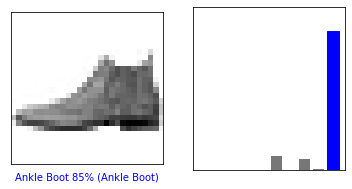

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions,y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

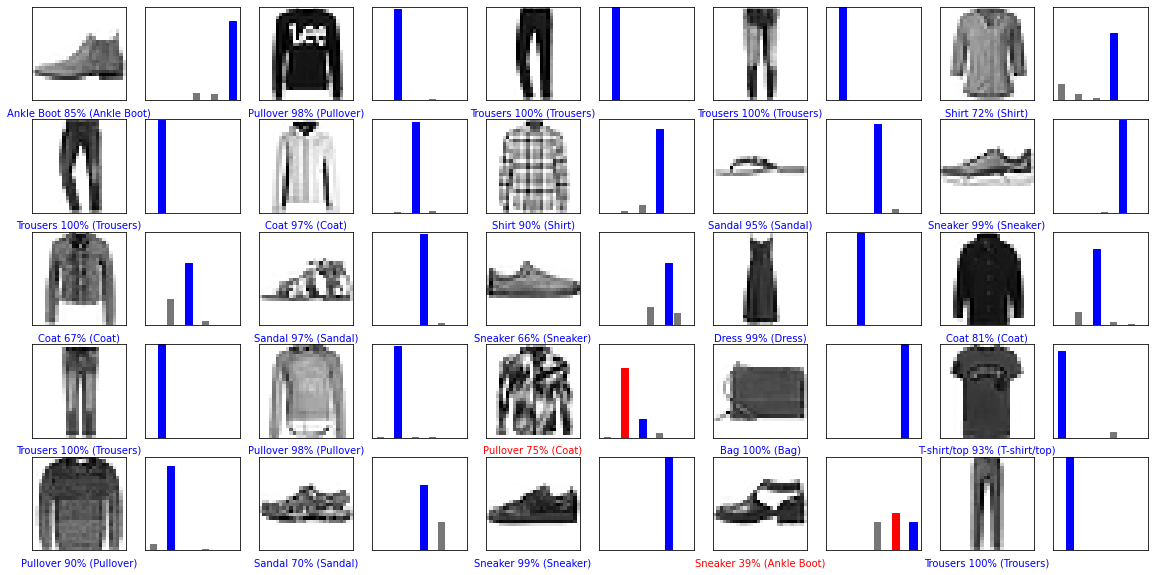

In [47]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  y_test)